### **PART 1**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip  /content/gdrive/MyDrive/viz-data-plaksha-final-s2021.zip

Archive:  /content/gdrive/MyDrive/viz-data-plaksha-final-s2021.zip
   creating: viz-data-plaksha-final-s2021/
  inflating: __MACOSX/._viz-data-plaksha-final-s2021  
  inflating: viz-data-plaksha-final-s2021/ny.txt  
  inflating: __MACOSX/viz-data-plaksha-final-s2021/._ny.txt  
  inflating: viz-data-plaksha-final-s2021/yahoo.txt  
  inflating: __MACOSX/viz-data-plaksha-final-s2021/._yahoo.txt  
  inflating: viz-data-plaksha-final-s2021/google.txt  
  inflating: __MACOSX/viz-data-plaksha-final-s2021/._google.txt  


In [ ]:
# Verify that the zip file is extracted correctly.
!ls  viz-data-plaksha-final-s2021 | wc -l

3


In [ ]:
ny = pd.read_csv('/content/viz-data-plaksha-final-s2021/ny.txt', sep = '\t')
google = pd.read_csv('/content/viz-data-plaksha-final-s2021/google.txt', sep = '\t')
yahoo = pd.read_csv('/content/viz-data-plaksha-final-s2021/yahoo.txt', sep = '\t')

In [ ]:
# display the head of the datasets
print(ny.head())
print('\n')
print(google.head())
print('\n')
print(yahoo.head())

   Modified Julian Date  Max Temperature
0                 48988               52
1                 49019               38
2                 49047               31
3                 49078               66
4                 49108               75


   Modified Julian Date  Stock Value
0                 55463       527.21
1                 55462       513.48
2                 55461       516.00
3                 55460       513.46
4                 55459       508.28


   Modified Julian Date  Stock Value
0                 55463        14.40
1                 55462        14.17
2                 55461        14.04
3                 55460        14.18
4                 55459        13.86


In [ ]:
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler

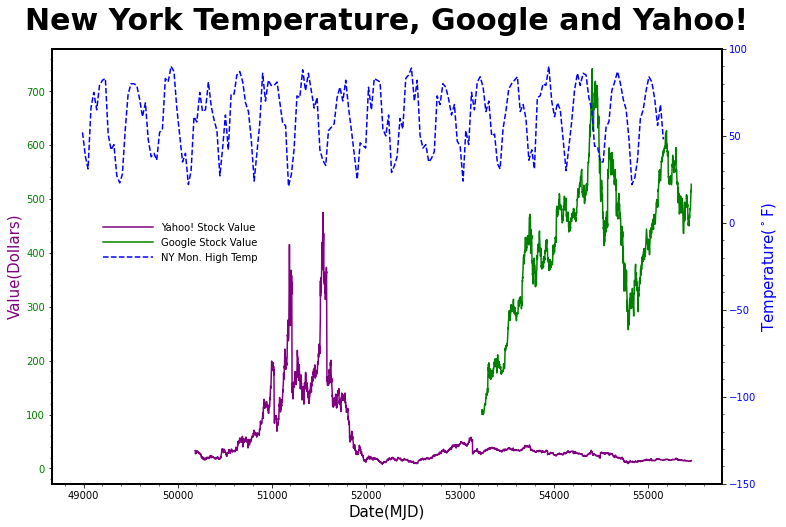

In [ ]:
fig, ax0 = plt.subplots(1, 1, figsize = (12,8))
ax0.set_title('New York Temperature, Google and Yahoo!', fontsize = 30, fontname = 'Times New Roman',fontweight = 'bold')
ax0.title.set_y(1.03)
plt1 = ax0.plot(yahoo['Modified Julian Date'], yahoo['Stock Value'], color = 'purple', label = 'Yahoo! Stock Value')
plt2 = ax0.plot(google['Modified Julian Date'], google['Stock Value'], color = 'green', label = 'Google Stock Value')
ax0.set_xlabel('Date(MJD)', fontsize = 15, fontname = 'Arial')
ax0.set_ylabel('Value(Dollars)', fontsize = 15, fontname = 'Arial',color='purple')
ax0.spines['top'].set_linewidth(2)
ax0.spines['bottom'].set_linewidth(2)
ax0.spines['left'].set_linewidth(2)
ax0.spines['right'].set_linewidth(2)

ax0.minorticks_on()
ax0.tick_params(axis = 'y', labelcolor = 'green')


ax0.set_ylabel('Value(Dollars)', fontsize = 15, fontname = 'Arial',color='purple')
ax1 = ax0.twinx()
plt3 = ax1.plot(ny['Modified Julian Date'], ny['Max Temperature'], ls = 'dashed', color = 'blue', label = 'NY Mon. High Temp')
ax1.set_ylim(-150,100)
ax1.set_ylabel('Temperature($^\circ$F)', fontsize = 15, fontname = 'Arial',color='blue')
ax1.minorticks_on()
ax1.tick_params(axis = 'y', labelcolor = 'blue')
plot = plt1+plt2+plt3
labels = [label.get_label() for label in plot]
ax1.legend(plot, labels, loc=(0.07, 0.5), frameon = False, handlelength = 5)


### **PART 2**

# Transfer Learning using EfficientNetB0
- In this notebook, I have used **Transfer Learning** to classify images of **Cat, Kanye West and Pickachu** using pre-trained ImageNet model **EfficientNetB0**.
- The image data used in this notebook has been scrapped from the internet.

In [2]:
pip install bing-image-downloader

In [ ]:
from bing_image_downloader import downloader


In [ ]:
query_string="Kanye west angry"

In [ ]:
downloader.download(query_string, limit=1000,  output_dir='/content/drive/MyDrive/dataset', adult_filter_off=True, force_replace=False, timeout=60, verbose=True)

Streaming output truncated to the last 5000 lines.
[%] Indexed 15 Images on Page 6468.




[!!]Indexing page: 6469

[%] Indexed 15 Images on Page 6469.




[!!]Indexing page: 6470

[%] Indexed 15 Images on Page 6470.




[!!]Indexing page: 6471

[%] Indexed 15 Images on Page 6471.




[!!]Indexing page: 6472

[%] Indexed 22 Images on Page 6472.




[!!]Indexing page: 6473

[%] Indexed 15 Images on Page 6473.




[!!]Indexing page: 6474

[%] Indexed 15 Images on Page 6474.




[!!]Indexing page: 6475

[%] Indexed 15 Images on Page 6475.




[!!]Indexing page: 6476

[%] Indexed 15 Images on Page 6476.




[!!]Indexing page: 6477

[%] Indexed 15 Images on Page 6477.




[!!]Indexing page: 6478

[%] Indexed 15 Images on Page 6478.




[!!]Indexing page: 6479

[%] Indexed 15 Images on Page 6479.




[!!]Indexing page: 6480

[%] Indexed 15 Images on Page 6480.




[!!]Indexing page: 6481

[%] Indexed 15 Images on Page 6481.




[!!]Indexing page: 6482

[%] Indexed 15 Images on Page 6482.





ConnectionResetError: ignored

In [3]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import (load_img, img_to_array, 
                                                  ImageDataGenerator)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
MAIN_DIR ='/content/drive/MyDrive/dataset'
PIKACHU_DIR = MAIN_DIR + '/Pikachu'


In [7]:
PIKACHU_DIR1 = MAIN_DIR + '/Pikachu smiling'

In [8]:
PIKACHU_DIR2 = MAIN_DIR + '/Cute Pikachu'

In [9]:
PIKACHU_DIR3 = MAIN_DIR + '/Pikachu lightning'

In [10]:
PIKACHU_DIR4 = MAIN_DIR + '/Pikachu image'

In [11]:
# define some global variables
BATCH_SIZE = 32
SEED = 42
IMG_SIZE = (224, 224)
LABELS = ['cat', 'kanye', 'pikachu']

### ***Read pikkachu images ***

In [12]:
images_data = []   # to store images
image_labels = []   # to store labels

# read and prepare images and labels 
for file_name in tqdm(os.listdir(PIKACHU_DIR)):
  try:
    # load and resize images
    image = load_img(os.path.join(PIKACHU_DIR, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(2)
  except:
    print(f'{file_name} image file is empty')

  7%|▋         | 22/314 [00:03<00:21, 13.88it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 314/314 [00:11<00:00, 27.08it/s]


In [13]:
# read and prepare images and labels 
for file_name in tqdm(os.listdir(PIKACHU_DIR1)):
  try:
    # load and resize images
    image = load_img(os.path.join(PIKACHU_DIR1, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(2)
  except:
    print(f'{file_name} image file is empty')

100%|██████████| 11/11 [00:02<00:00,  3.91it/s]

.ipynb_checkpoints image file is empty


In [14]:
# read and prepare images and labels 
for file_name in tqdm(os.listdir(PIKACHU_DIR2)):
  try:
    # load and resize images
    image = load_img(os.path.join(PIKACHU_DIR2, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(2)
  except:
    print(f'{file_name} image file is empty')

 26%|██▌       | 100/383 [00:05<00:04, 59.45it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
 96%|█████████▋| 369/383 [00:09<00:00, 58.27it/s]

.ipynb_checkpoints image file is empty


100%|██████████| 383/383 [00:09<00:00, 38.67it/s]


In [15]:
# read and prepare images and labels 
for file_name in tqdm(os.listdir(PIKACHU_DIR3)):
  try:
    # load and resize images
    image = load_img(os.path.join(PIKACHU_DIR3, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(2)
  except:
    print(f'{file_name} image file is empty')

100%|██████████| 20/20 [00:04<00:00,  4.59it/s]

.ipynb_checkpoints image file is empty


In [16]:
# read and prepare images and labels 
for file_name in tqdm(os.listdir(PIKACHU_DIR4)):
  try:
    # load and resize images
    image = load_img(os.path.join(PIKACHU_DIR4, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(2)
  except:
    print(f'{file_name} image file is empty')

 24%|██▎       | 110/466 [00:10<00:09, 35.75it/s]/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
100%|██████████| 466/466 [00:18<00:00, 25.15it/s]

.ipynb_checkpoints image file is empty


### **KANYE WEST IMAGES**

In [17]:
MAIN_DIR1 ='/content/drive/MyDrive/dataset'
KW_DIR = MAIN_DIR1 + '/Kanye'
KW_DIR1 = MAIN_DIR1 + '/Kanye West'
KW_DIR2 = MAIN_DIR1 + '/Kanye West alone'
KW_DIR3 = MAIN_DIR1 + '/Kanye West image'
KW_DIR4 = MAIN_DIR1 + '/Kanye West picture'
KW_DIR5 = MAIN_DIR1 + '/Kanye West stare'
KW_DIR6=  MAIN_DIR1+'/Kanye West Smiling'
KW_DIR7= MAIN_DIR1+'/Kanye west angry'






In [18]:


# read and prepare images and labels 
for file_name in tqdm(os.listdir(KW_DIR)):
  try:
    # load and resize images
    image = load_img(os.path.join(KW_DIR, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(1)
  except:
    print(f'{file_name} image file is empty')

100%|██████████| 76/76 [00:17<00:00,  4.29it/s]

.ipynb_checkpoints image file is empty


In [19]:
# read and prepare images and labels 
for file_name in tqdm(os.listdir(KW_DIR1)):
  try:
    # load and resize images
    image = load_img(os.path.join(KW_DIR1, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(1)
  except:
    print(f'{file_name} image file is empty')

100%|██████████| 150/150 [00:07<00:00, 20.89it/s]


In [20]:
# read and prepare images and labels 
for file_name in tqdm(os.listdir(KW_DIR2)):
  try:
    # load and resize images
    image = load_img(os.path.join(KW_DIR2, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(1)
  except:
    print(f'{file_name} image file is empty')

100%|██████████| 93/93 [00:19<00:00,  4.77it/s]

.ipynb_checkpoints image file is empty


In [21]:
# read and prepare images and labels 
for file_name in tqdm(os.listdir(KW_DIR3)):
  try:
    # load and resize images
    image = load_img(os.path.join(KW_DIR3, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(1)
  except:
    print(f'{file_name} image file is empty')

100%|██████████| 100/100 [00:24<00:00,  4.05it/s]

.ipynb_checkpoints image file is empty


In [22]:
# read and prepare images and labels 
for file_name in tqdm(os.listdir(KW_DIR4)):
  try:
    # load and resize images
    image = load_img(os.path.join(KW_DIR4, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(1)
  except:
    print(f'{file_name} image file is empty')

 22%|██▏       | 20/92 [00:04<00:15,  4.58it/s]

.ipynb_checkpoints image file is empty


100%|██████████| 92/92 [00:22<00:00,  4.10it/s]


In [23]:
# read and prepare images and labels 
for file_name in tqdm(os.listdir(KW_DIR5)):
  try:
    # load and resize images
    image = load_img(os.path.join(KW_DIR5, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(1)
  except:
    print(f'{file_name} image file is empty')

 29%|██▊       | 67/235 [00:03<00:04, 41.83it/s]

.ipynb_checkpoints image file is empty


100%|██████████| 235/235 [00:07<00:00, 30.88it/s]


In [24]:
# read and prepare images and labels 
for file_name in tqdm(os.listdir(KW_DIR6)):
  try:
    # load and resize images
    image = load_img(os.path.join(KW_DIR6, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(1)
  except:
    print(f'{file_name} image file is empty')

 94%|█████████▍| 94/100 [00:22<00:01,  4.68it/s]

.ipynb_checkpoints image file is empty


100%|██████████| 100/100 [00:23<00:00,  4.27it/s]


In [25]:
# read and prepare images and labels 
for file_name in tqdm(os.listdir(KW_DIR7)):
  try:
    # load and resize images
    image = load_img(os.path.join(KW_DIR7, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(1)
  except:
    print(f'{file_name} image file is empty')

100%|██████████| 276/276 [00:06<00:00, 41.19it/s]


## **Reading cat dataset**

In [28]:
path='/content/drive/MyDrive/dataset/cats'

In [29]:
count=0
from sys import path_hooks
# read and prepare images and labels 
for file_name in tqdm(os.listdir(path)):
  try:
    # load and resize images
    image = load_img(os.path.join(path, file_name), 
                     target_size = IMG_SIZE)
    # convert image into array
    images_data.append(img_to_array(image))
    # prepare labels 
    image_labels.append(0)
    count=count+1
    if count>1200:
      break
  except:
    print(f'{file_name} image file is empty')

 73%|███████▎  | 1200/1647 [00:19<00:07, 60.27it/s] 


## Display few random images from the dataset

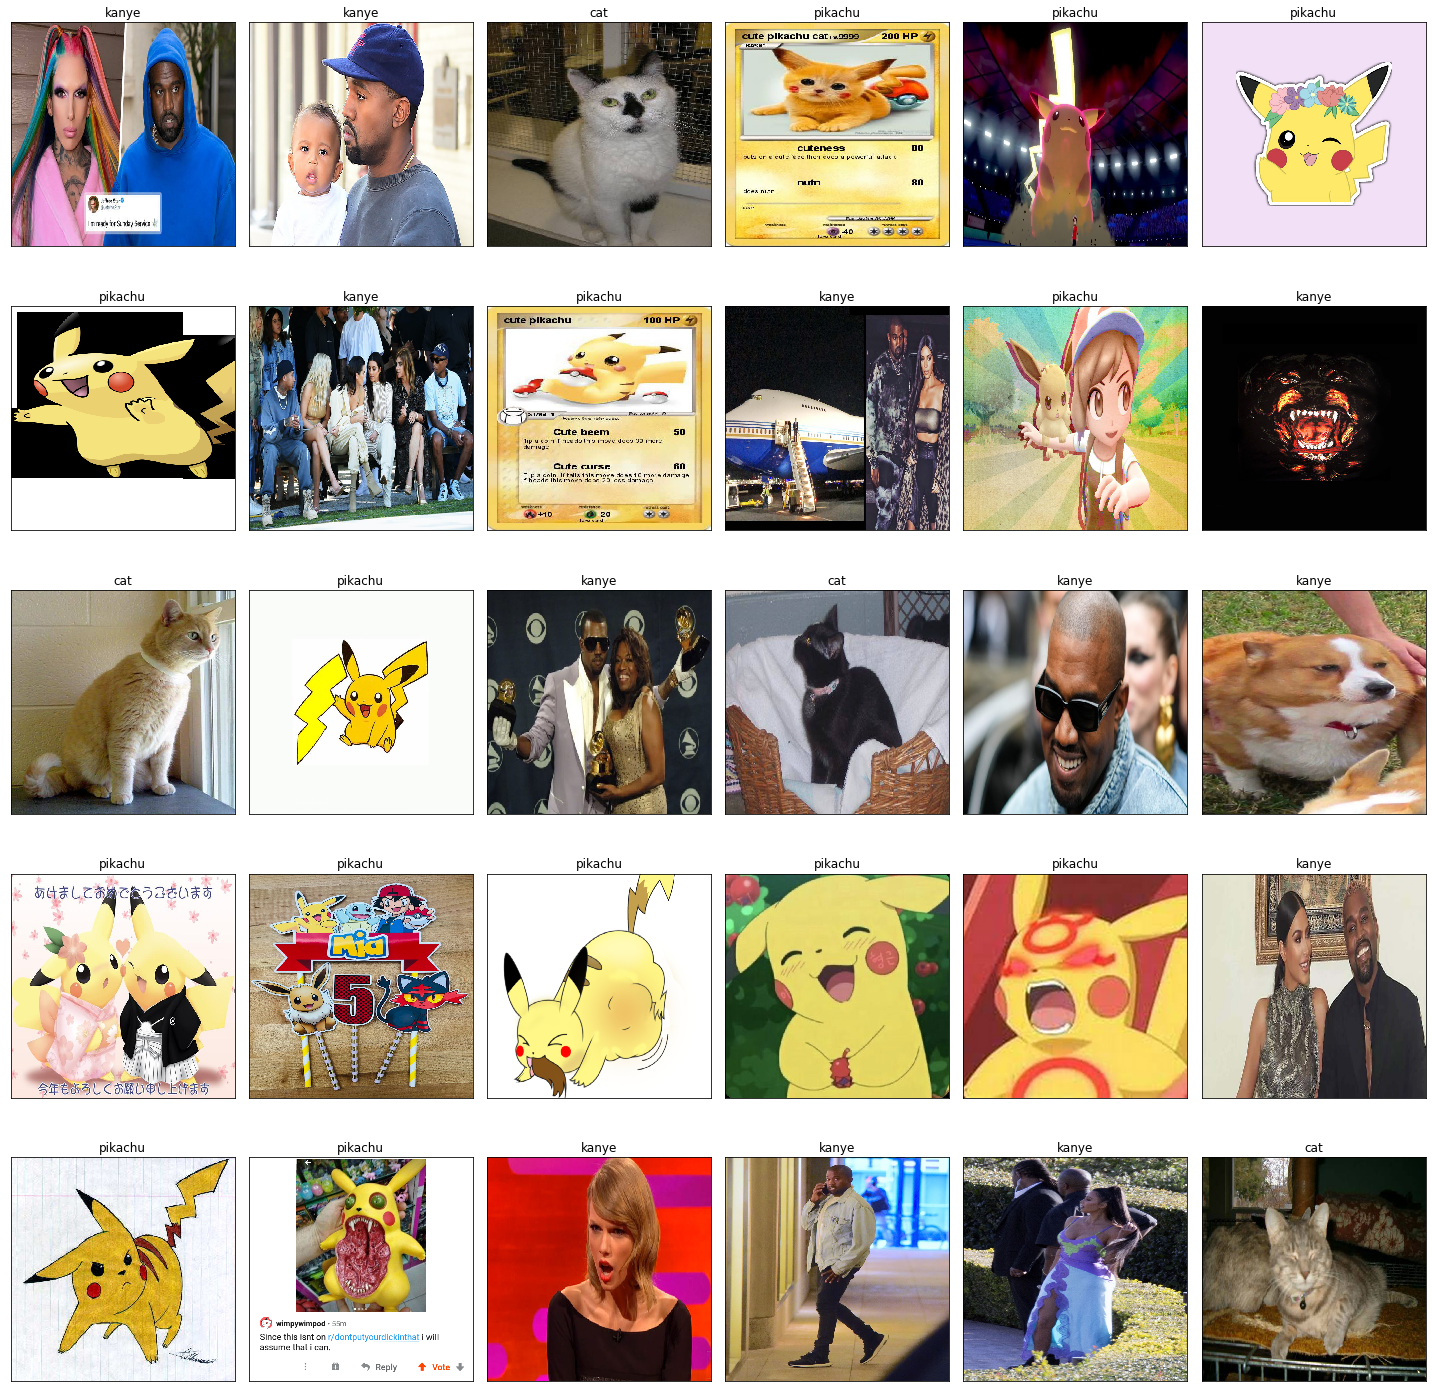

In [30]:
# create figure object
fig, axes = plt.subplots(5, 6, figsize = (20, 20))
for i, ax in enumerate(axes.flatten()):
  # choose random index
  index = np.random.choice(len(images_data))
    
  # display image and label
  ax.imshow(images_data[index] / 255.0)
  ax.set_title(LABELS[image_labels[index]])

  # make figure axes invisible
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.tight_layout()

### **Splitting data into training,Test and validation set**

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
#test split
X, X_test, y, y_test = train_test_split( np.array(images_data), np.array(image_labels), test_size=0.013, random_state=42,stratify = np.array(image_labels))
#train and validation split
X_train,X_val,y_train,y_val=train_test_split(X, y, test_size=0.15, random_state=42,stratify = y)
# print the shape of train, test and validation data sets
print(f'Shape of x_train: {X_train.shape}\nShape of y_train: {y_train.shape}')
print(f'Shape of x_test: {X_test.shape}\nShape of y_test: {y_test.shape}')
print(f'Shape of x_val: {X_val.shape}\nShape of y_val: {y_val.shape}')

Shape of x_train: (2941, 224, 224, 3)
Shape of y_train: (2941,)
Shape of x_test: (46, 224, 224, 3)
Shape of y_test: (46,)
Shape of x_val: (520, 224, 224, 3)
Shape of y_val: (520,)


## Load pretrained model

In [33]:
# EfficientNetB0 model
base_model = tf.keras.applications.EfficientNetB0(include_top = False,
                                                  weights = 'imagenet',
                                                  input_shape = (224, 224, 3))

# freeze the base model
base_model.trainable = False

x = tf.keras.layers.GlobalAveragePooling2D(name = 'g_pool')(base_model.output)
x = tf.keras.layers.Dropout(0.3, name = 'drop_1')(x)
x = tf.keras.layers.Dense(32, activation = 'relu', name = 'dense_1')(x)
x = tf.keras.layers.Dropout(0.3, name = 'drop_2')(x)
output = tf.keras.layers.Dense(3, activation = 'softmax', name = 'output')(x)

model = tf.keras.Model(base_model.inputs, output, name = 'classification_model')
model.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "classification_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad

## Compile and fit the model

In [34]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 20,
                    validation_data = (X_val, y_val))

Epoch 1/20
92/92 [==============================] - 151s 2s/step - loss: 0.2107 - accuracy: 0.9300 - val_loss: 0.0757 - val_accuracy: 0.9827
Epoch 2/20
92/92 [==============================] - 143s 2s/step - loss: 0.0844 - accuracy: 0.9738 - val_loss: 0.0712 - val_accuracy: 0.9808
Epoch 3/20
92/92 [==============================] - 142s 2s/step - loss: 0.0668 - accuracy: 0.9762 - val_loss: 0.0596 - val_accuracy: 0.9846
Epoch 4/20
92/92 [==============================] - 142s 2s/step - loss: 0.0588 - accuracy: 0.9799 - val_loss: 0.0610 - val_accuracy: 0.9865
Epoch 5/20
92/92 [==============================] - 146s 2s/step - loss: 0.0407 - accuracy: 0.9844 - val_loss: 0.0614 - val_accuracy: 0.9846
Epoch 6/20
92/92 [==============================] - 145s 2s/step - loss: 0.0331 - accuracy: 0.9895 - val_loss: 0.0569 - val_accuracy: 0.9846
Epoch 7/20
92/92 [==============================] - 142s 2s/step - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.0633 - val_accuracy: 0.9865
Epoch 8/20
92

## Plot training and validation loss 

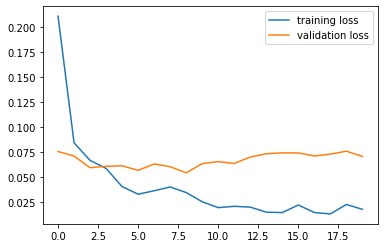

In [35]:
# training and validation loss
plt.plot(range(0, 20), history.history['loss'])
plt.plot(range(0, 20), history.history['val_loss'])
plt.legend(['training loss', 'validation loss'])

##Plot training and validation accuracy

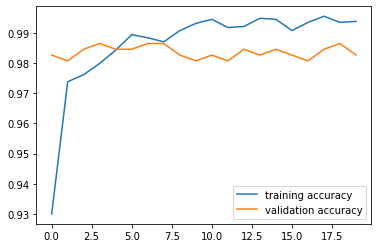

In [36]:
# training and validation accuracy
plt.plot(range(0, 20), history.history['accuracy'])
plt.plot(range(0, 20), history.history['val_accuracy'])
plt.legend(['training accuracy', 'validation accuracy'])


## Evaluate the model performance on the test data

In [44]:
# calculate class probabilities
class_probs = model.predict(X_test)

# extract index with maximum probabilities
labels = np.argmax(class_probs, axis = -1)

# print class probabilities
print(class_probs)


[[1.00000000e+00 1.66674799e-10 1.15789565e-08]
 [9.99999762e-01 6.67500757e-08 6.21251814e-08]
 [1.09580213e-10 1.00000000e+00 6.65356008e-13]
 [9.99966025e-01 2.71893714e-05 6.81685697e-06]
 [1.65754843e-09 9.99999881e-01 1.47462558e-07]
 [3.09708509e-10 1.73514236e-09 1.00000000e+00]
 [4.50717152e-07 7.48511884e-05 9.99924660e-01]
 [1.39326842e-10 6.21655749e-09 1.00000000e+00]
 [3.81848497e-10 9.99999881e-01 6.97866369e-08]
 [6.29933050e-10 1.00000000e+00 1.38944223e-09]
 [1.00000000e+00 9.36996591e-10 1.34988829e-08]
 [5.93008372e-05 9.99726474e-01 2.14134809e-04]
 [4.49881270e-08 9.99999166e-01 7.82271002e-07]
 [9.99997616e-01 7.49870424e-07 1.66834411e-06]
 [3.76969567e-09 8.65614311e-07 9.99999166e-01]
 [2.34552600e-09 4.59157290e-09 1.00000000e+00]
 [9.99999762e-01 3.34369171e-10 2.14182577e-07]
 [8.37965577e-04 3.92877400e-01 6.06284678e-01]
 [4.72129402e-09 2.32056391e-05 9.99976754e-01]
 [1.00000000e+00 2.36886097e-12 1.79535087e-09]
 [1.26103803e-08 1.00000000e+00 2.358396

## Display test results

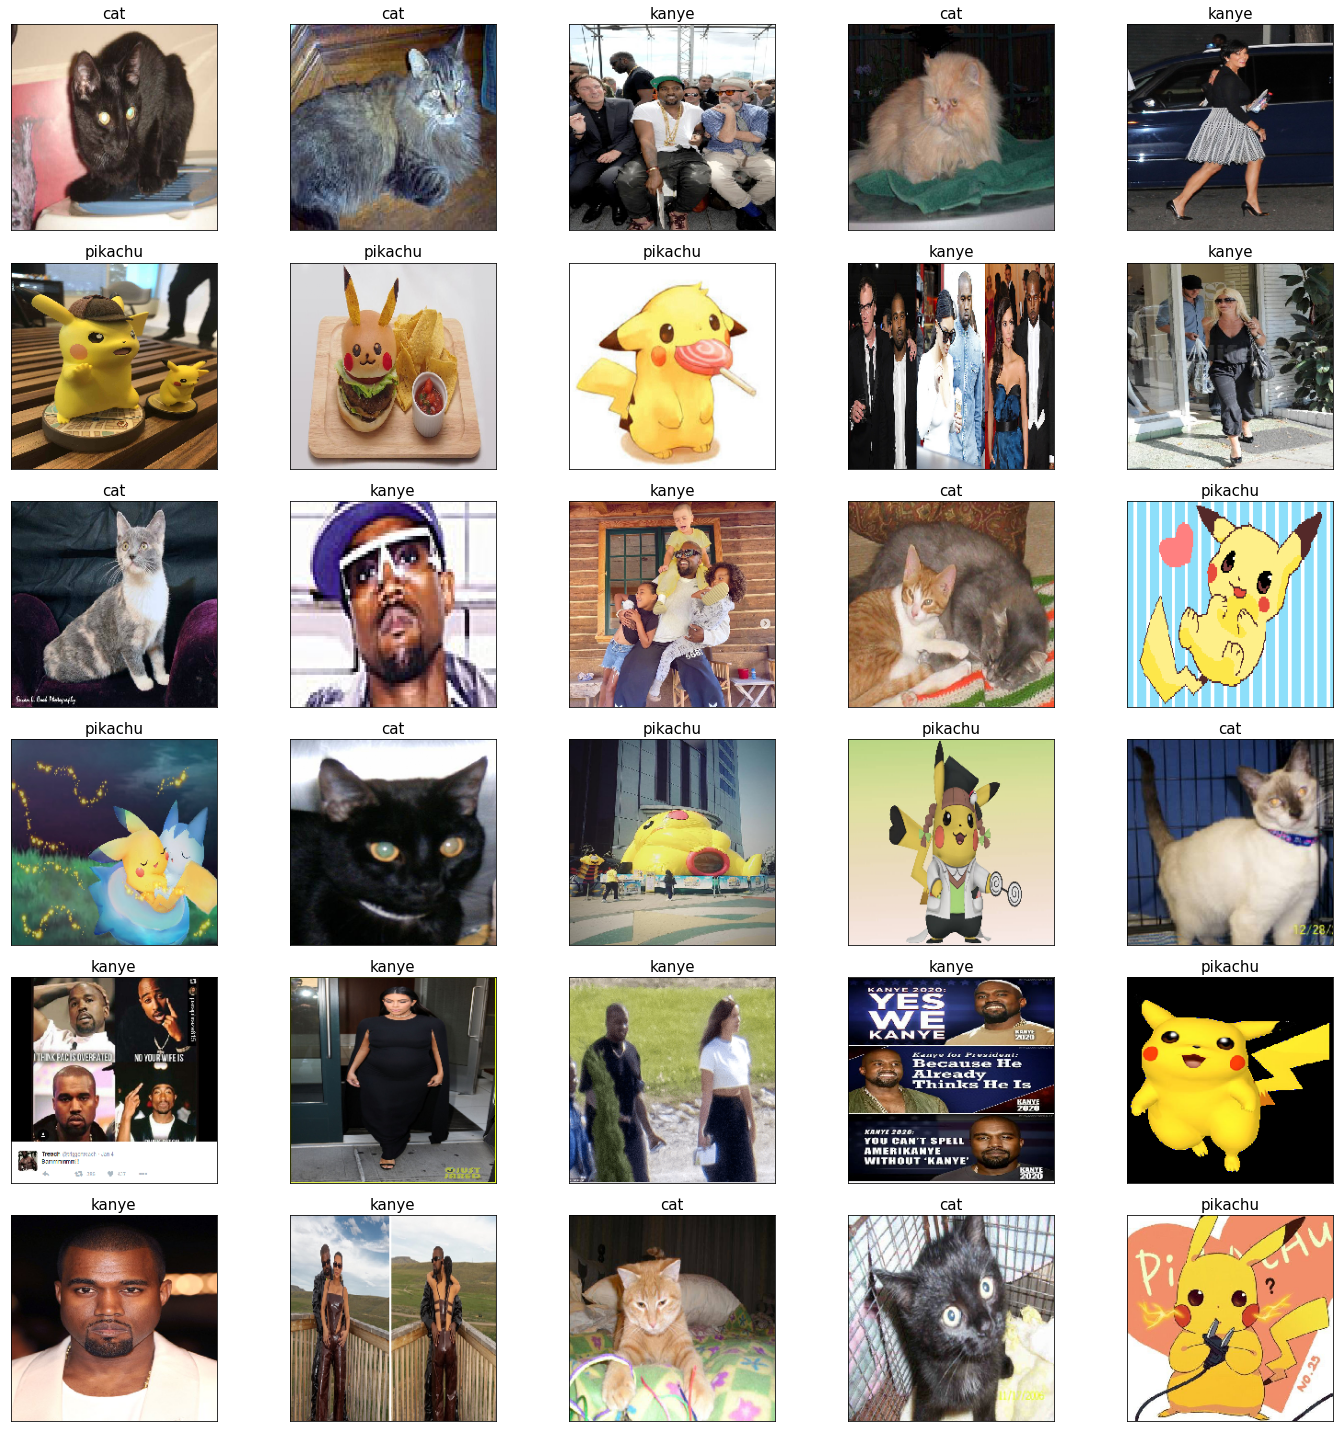

In [45]:
# first 30 examples
fig, axis = plt.subplots(6, 5, figsize = (20, 20))
for i, ax in enumerate(axis.flatten()):
  # show image and predicted label
  ax.imshow(X_test[i] / 255)
  ax.set_title(LABELS[labels[i]],fontsize = 15)
  # make figure axes invisible
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.tight_layout()

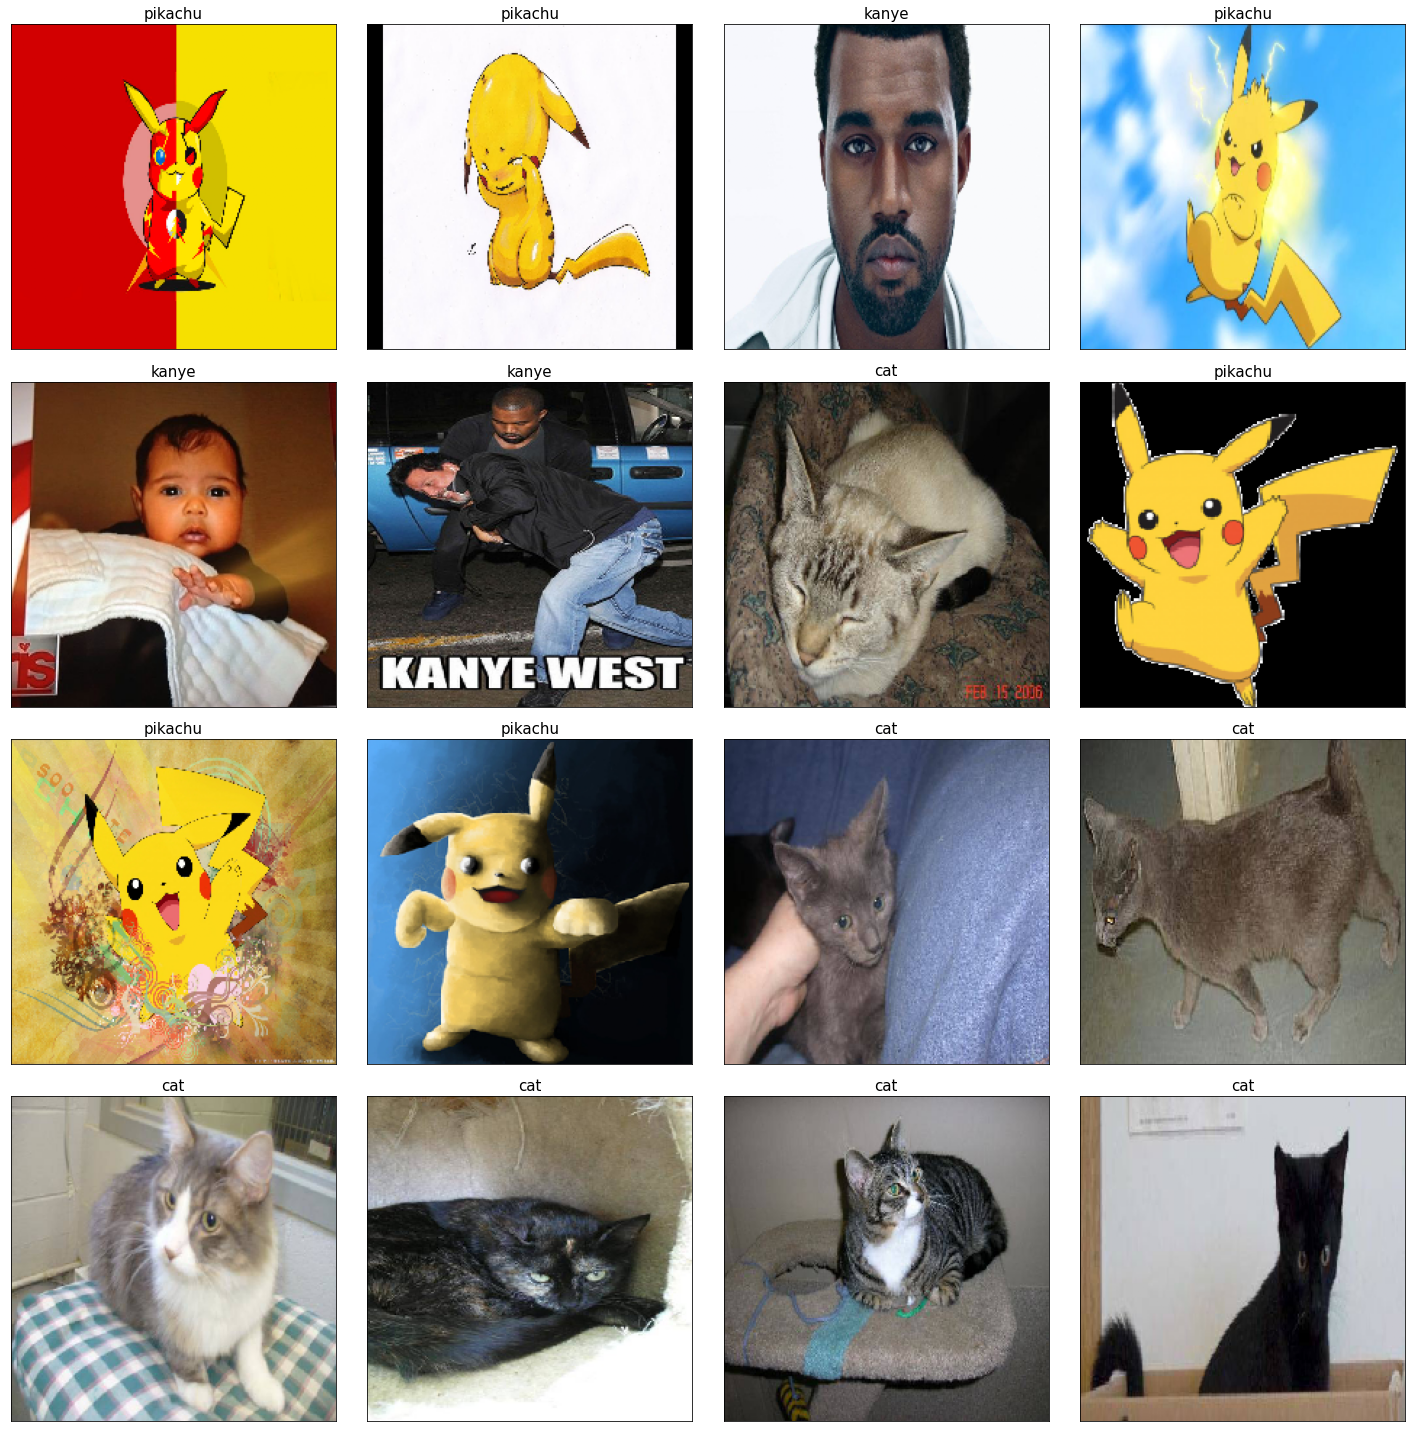

In [46]:
# first 16 examples
fig, axis = plt.subplots(4, 4, figsize = (20, 20))
for i, ax in enumerate(axis.flatten()):
  # show image and predicted label
  ax.imshow(X_test[i+30] / 255)
  ax.set_title(LABELS[labels[i+30]], fontsize = 15)
  # make figure axes invisible
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.tight_layout()

### Plot confusion matrix 

In [47]:
# evaluate model on validation data
print("pred=",model.predict(X_val))
y_pred = np.argmax(model.predict(X_val), axis = -1)
#print(y_pred)

pred= [[9.9999964e-01 3.5263704e-07 2.3382677e-08]
 [4.1356891e-08 6.6753512e-07 9.9999928e-01]
 [7.8381071e-09 1.0000000e+00 1.0749406e-08]
 ...
 [5.3039933e-08 9.9999940e-01 5.8760185e-07]
 [2.8987922e-06 9.9999666e-01 5.1425604e-07]
 [1.0000000e+00 3.6340783e-08 4.7114113e-08]]


In [48]:
confusion_matrix(y_val, y_pred, labels = [0, 1, 2])


array([[177,   1,   0],
       [  0, 161,   4],
       [  1,   3, 173]])